# Transforming Data With Pandas

In this mission, we'll continue working with the World Happiness Report and explore another aspect of it that we haven't analyzed yet - __the factors that contribute happiness__.

Throughout this mission, we'll refer to the columns above as the "factor" columns. We'll work to answer the following question in this mission:

- ___Which of the factors above contribute the most to the happiness score?___

However, in order to answer this question, we need to manipulate our data into a format that makes it easier to analyze. __We'll explore the following functions and methods__ to perform this task:

- __`Series.map()`__
- __`Series.apply()`__
- __`DataFrame.applymap()`__
- __`DataFrame.apply()`__
- __`pd.melt()`__

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Instructions

1. Recall that the 2015 World Happiness Report is saved to a variable named `happiness2015`. We also created a dictionary named mapping for renaming columns.

2. Use the __`DataFrame.rename()`__ method to change the `'Economy (GDP per Capita)'`, `'Health (Life Expectancy)'`, and `'Trust (Government Corruption)'` column names to the names specified in the mapping dictionary.
Pass the mapping dictionary into the __`df.rename()`__ method and set the `axis` parameter to `1`.
Assign the result back to `happiness2015`.

In [11]:
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2015.index.name = None
happiness2015["Year"] = 2015



happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2015.index.name = None
happiness2016["Year"] = 2016

happiness2017 = pd.read_csv("World_Happiness_2017.csv")
happiness2017.index.name = None
happiness2017["Year"] = 2017
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)


mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust' }

happiness2015 = happiness2015.rename(mapping, axis=1)
# axis : int or str
# Axis to target with mapper. Can be either the axis name (‘index’, ‘columns’) or number (0, 1). The default is ‘index’.

---
## Instructions

1. Use the __`Series.map()`__ method to apply the label function to the `Economy` column in `happiness2015`. Assign the result to `economy_impact_map`.
2. Use the __`Series.apply()`__ method to apply the function to the `Economy` column. Assign the result to `economy_impact_apply`.
3. Use the following code to check if the methods produce the same result: <br>
__`economy_impact_map.equals(economy_impact_apply)`__. Assign the result to a variable named `equal`.

In [12]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

In [13]:
economy_impact_map = happiness2015.Economy.map(label)
economy_impact_apply = happiness2015.Economy.apply(label)

equal = economy_impact_map.equals(economy_impact_apply)

---
__`Series.map()` and `Series.apply()` don't modify the original series.__ <br>
If we want to work with the new series in the original dataframe, we must either assign the results back to the original column or create a new column. <br>
__We recommend creating a new column, in case you need to reference the original values.__ <br>
Let's do that next:

In [10]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
happiness2015['Economy Impact'] = happiness2015['Economy'].map(label)
happiness2015[['Economy', 'Economy Impact']].head(3)

,Economy,Economy Impact
0,1.39651,High
1,1.30232,High
2,1.32548,High


### Instructions

1. Update `label` to take in another argument named `x`. If the element is greater than `x`, return `'High'`. Otherwise, return `'Low'`.
2. Then, use the `apply` method to apply `label` to the `Economy` column and set the `x` argument to` 0.8`. 
3. Save the result back to `economy_impact_apply`.

In [14]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'

economy_impact_apply = happiness2015['Economy'].apply(label, x = .8)

### Instructions

_We've already created a list named factors containing the column names for the six factors that contribute to the `happiness score`._

1. Use the __`df.applymap()`__ method to apply the label function to the columns saved in factors in `happiness2015`. Assign the result to `factors_impact`.

In [15]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
    
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact = happiness2015[factors].applymap(label)
factors_impact.head(3)

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low


### Instructions

1. Create a function that calculates the percentage of `'High'` and `'Low'` values in each column.
    - Create a function named `v_counts` that accepts one parameter called `col`.
    - Use the `Series.value_counts()` method to calculate the value counts for `col`. Assign the result to `num`.
    - Use the `Series.size` attribute to calculate the number of `rows` in the column. Assign the result to `den.`
    - Divide `num` by `den` and return the `result`.
2. Use the `df.apply()` method to apply the `v_counts` function to all of the columns in `factors_impact`. 
3. Assign the result to `v_counts_pct`.

In [16]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den

v_counts_pct = factors_impact.apply(v_counts)

### Instructions

1. Create a function that ___converts each of the six factor columns and the `Dystopia Residual` column to percentages.____

2. Use the __`df.apply()`___ method to apply the percentages function to all of the columns in factors. Assign the result to `factor_percentages`.

In [17]:
happiness2015.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015


In [18]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages (col):
    div = col / happiness2015['Happiness Score']
    return div * 100

factor_percentages = happiness2015[factors].apply(percentages)

### Instructions

1. Use the `melt` function to reshape `happiness2015`. The columns listed in `main_cols` should stay the same. The columns listed in `factors` should be transformed into rows. Assign the result to a variable called `melt`.
2. Convert the value column to a percentage.
    -  Divide the value column by the `Happiness Score` column and multiply the result by 100.
    - Use the `round()` function to round the result to 2 decimal places.
    - Assign the result to a new column called `Percentage`.
    
    
    
- _https://docs.python.org/3/library/functions.html#round – `round` documentation_

In [19]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

melt = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)
Percentage = melt.value
Percentage = (melt.value / melt['Happiness Score'] * 100).round(2)
melt["Percentage"] = Percentage

In [20]:
melt.head(3)

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61


In [21]:
happiness2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


---
# Tydying data

In the last exercise, __we__ used the __`melt`__ function to __reshape our data so__ that __we could use vectorized operations__ to convert the value column into percentages.

The `melt` function moved the values in the seven columns - Economy, Health, Family, Freedom, Generosity, Trust, and Dystopia Residual - to the same column, __which meant we could transform them all at once__.

You may have also noticed that __now the data is in a format that makes it easier to aggregate__. We refer to data in this format as ___tidy data___. If you're interested in learning more about the tidy format, you can read about it here:
- https://www.jstatsoft.org/article/view/v059i10

Next, __let's group the data by the `variable` column__, find the mean value of each variable (or factor), and plot the results to see how much each factor contributes to the __`happiness score`__ on average. <br>
In the last mission, we combined the 2015, 2016, and 2017 reports, aggregated the data by the `Year` column using the `df.pivot_table()` method, and then plotted the results as follows:

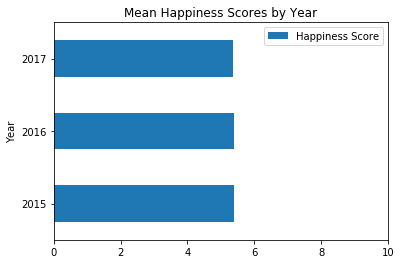

In [22]:
#Concatenate happiness2015, happiness2016, and happiness2017.
combined = pd.concat([happiness2015, happiness2016, happiness2017], sort=True)

#Create a pivot table lising the mean happiness score for each year. Since the default aggregation function is the mean, we excluded the `aggfunc` argument.
pivot_table_combined = combined.pivot_table(index = 'Year', values = 'Happiness Score')

#Plot the pivot table.
pivot_table_combined.plot(kind ='barh', title='Mean Happiness Scores by Year', xlim = (0,10));

Let's repeat the same task, __but this time, we'll group the data by the variable column__ instead of the Year column and __plot the results using a pie chart__.

### Instructions

1. Use the `df.pivot_table()` method to create a pivot table from the melt dataframe. 
     -  Set the `variable` column as the index and the `value` column as the values. 
     - Assign the result to `pv_melt`.
2. Use the `df.plot()` method to create a pie chart of the results. 
    - Set the kind parameter to 'pie', 
    - the y parameter to 'value', 
    - and the legend parameter to False, so we can better see the results.
3. If we disregard `Dystopia Residual`, which two factors, on average, contribute the most to the happiness score?

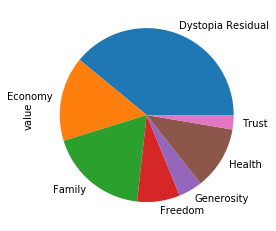

In [23]:
pv_melt = melt.pivot_table(index='variable', values='value')
pv_melt.plot.pie(y='value', legend=False);

### --- done ---